In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("flag_data.csv")
df

Name  Continent  Zone  Area  Population  Language  Religion  \
0       Afghanistan          5     1   648          16        10         2   
1           Albania          3     1    29           3         6         6   
2           Algeria          4     1  2388          20         8         2   
3    American-Samoa          6     3     0           0         1         1   
4           Andorra          3     1     0           0         6         0   
..              ...        ...   ...   ...         ...       ...       ...   
189   Western-Samoa          6     3     3           0         1         1   
190      Yugoslavia          3     1   256          22         6         6   
191           Zaire          4     2   905          28        10         5   
192          Zambia          4     2   753           6        10         5   
193        Zimbabwe          4     2   391           8        10         5   

     bars  stripes  colours  ...  saltires  quarters  sunstars  crescent  \
0       0        3        5  ...         0         0         1         0   
1       0        0        3  ...         0         0         1         0   
2       2        0        3  ...         0         0         1         1   
3       0        0        5  ...         0         0         0         0   
4       3        0        3  ...         0         0         0         0   
..    ...      ...      ...  ...       ...       ...       ...       ...   
189     0        0        3  ...         0         1         5         0   
190     0        3        4  ...         0         0         1         0   
191     0        0        4  ...         0         0         0         0   
192     3        0        4  ...         0         0         0         0   
193     0        7        5  ...         0         0         1         0   

     triangle  icon  animate text  topleft  botright  
0           0     1        0    0    black     green  
1           0     0        1    0      red       red  
2           0     0        0    0    green     white  
3           1     1        1    0     blue       red  
4           0     0        0    0     blue       red  
..        ...   ...      ...  ...      ...       ...  
189         0     0        0    0     blue       red  
190         0     0        0    0     blue       red  
191         0     1        1    0    green     green  
192         0     0        1    0    green     brown  
193         1     1        1    0    green     green  

[194 rows x 30 columns]

In [4]:
NorthAme = df[df["Continent"]==1]
SouthAme = df[df["Continent"]==2]
Europe = df[df["Continent"]==3]
Africa = df[df["Continent"]==4]
Asia = df[df["Continent"]==5]
Oceania = df[df["Continent"]==6]

In [5]:
import sqlite3
conn = sqlite3.connect('countries.db')
df.to_sql("flags",conn,if_exists="replace", index=False)
NorthAme.to_sql("NA",conn,if_exists="replace", index=False)
SouthAme.to_sql("SA",conn,if_exists="replace", index=False)
Europe.to_sql("EU",conn,if_exists="replace", index=False)
Africa.to_sql("Afri",conn,if_exists="replace", index=False)
Asia.to_sql("Asi",conn,if_exists="replace", index=False)
Oceania.to_sql("Oce",conn,if_exists="replace", index=False)

In [6]:

mainhue_NA = pd.read_sql_query("""
SELECT mainhue, count(*) AS `number of main colors`
FROM NA
GROUP BY mainhue
ORDER BY `number of main colors` DESC
""", conn)

mainhue_NA = mainhue_NA.set_index("mainhue")
list(mainhue_NA.index)

['blue', 'green', 'white', 'red', 'black', 'gold']

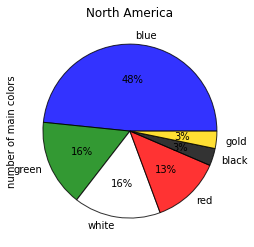

In [7]:
#mainhue_NA = mainhue_NA.set_index("mainhue")
NA_plot = mainhue_NA['number of main colors']
NA_plot.plot.pie(title = "North America",autopct='%1.0f%%',colors = list(mainhue_NA.index),
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

In [8]:
mainhue_SA = pd.read_sql_query("""
SELECT mainhue, count(*) AS `number of main colors`
FROM SA
GROUP BY mainhue
ORDER BY `number of main colors` DESC
""", conn)
mainhue_SA = mainhue_SA.set_index("mainhue")
SA_plot = mainhue_SA['number of main colors']
SA_plot.plot.pie(title = "South America",autopct='%1.0f%%',colors = list(mainhue_SA.index),
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

In [9]:
mainhue_EU = pd.read_sql_query("""
SELECT mainhue, count(*) AS `number of main colors`
FROM EU
GROUP BY mainhue
ORDER BY `number of main colors` DESC
""", conn)
mainhue_EU = mainhue_EU.set_index("mainhue")
EU_plot = mainhue_EU['number of main colors']
EU_plot.plot.pie(title = "Europe",autopct='%1.0f%%',colors = list(mainhue_EU.index),
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

In [10]:
pd.set_option("display.max_columns",None)
Europe

Name  Continent  Zone  Area  Population  Language  Religion  \
1           Albania          3     1    29           3         6         6   
4           Andorra          3     1     0           0         6         0   
11          Austria          3     1    84           8         4         0   
16          Belgium          3     1    31          10         6         0   
26         Bulgaria          3     1   111           9         5         6   
44           Cyprus          3     1     9           1         6         1   
45   Czechoslovakia          3     1   128          15         5         6   
46          Denmark          3     1    43           5         6         1   
55          Faeroes          3     4     1           0         6         1   
58          Finland          3     1   337           5         9         1   
59           France          3     1   547          54         3         0   
64      Germany-DDR          3     1   108          17         4         6   
65      Germany-FRG          3     1   249          61         4         1   
67        Gibraltar          3     4     0           0         1         1   
68           Greece          3     1   132          10         6         1   
79          Hungary          3     1    93          11         9         6   
80          Iceland          3     4   103           0         6         1   
85          Ireland          3     4    70           3         1         0   
87            Italy          3     1   301          57         6         0   
101   Liechtenstein          3     1     0           0         4         0   
102      Luxembourg          3     1     3           0         4         0   
108           Malta          3     1     0           0        10         0   
114          Monaco          3     1     0           0         3         0   
121     Netherlands          3     1    41          14         6         1   
130          Norway          3     1   324           4         6         1   
138          Poland          3     1   313          36         5         6   
139        Portugal          3     4    92          10         6         0   
142         Romania          3     1   237          22         6         6   
144      San-Marino          3     1     0           0         6         0   
156           Spain          3     4   505          38         2         0   
165          Sweden          3     1   450           8         6         1   
166     Switzerland          3     1    41           6         4         1   
180              UK          3     4   245          56         1         1   
186    Vatican-City          3     1     0           0         6         0   
190      Yugoslavia          3     1   256          22         6         6   

     bars  stripes  colours  red  green  blue  gold  white  black  orange  \
1       0        0        3    1      0     0     1      0      1       0   
4       3        0        3    1      0     1     1      0      0       0   
11      0        3        2    1      0     0     0      1      0       0   
16      3        0        3    1      0     0     1      0      1       0   
26      0        3        5    1      1     1     1      1      0       0   
44      0        0        3    0      1     0     1      1      0       0   
45      0        0        3    1      0     1     0      1      0       0   
46      0        0        2    1      0     0     0      1      0       0   
55      0        0        3    1      0     1     0      1      0       0   
58      0        0        2    0      0     1     0      1      0       0   
59      3        0        3    1      0     1     0      1      0       0   
64      0        3        3    1      0     0     1      0      1       0   
65      0        3        3    1      0     0     1      0      1       0   
67      0        1        3    1      0     0     1      1      0       0   
68      0        9        2    0      0     1     0

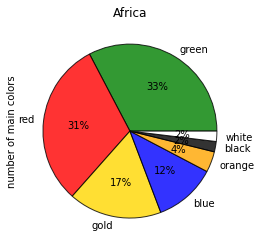

In [11]:
mainhue_Afri = pd.read_sql_query("""
SELECT mainhue, count(*) AS `number of main colors`
FROM Afri
GROUP BY mainhue
ORDER BY `number of main colors` DESC
""", conn)
mainhue_Afri
mainhue_Afri = mainhue_Afri.set_index("mainhue")
Afri_plot = mainhue_Afri['number of main colors']
Afri_plot.plot.pie(title = "Africa",autopct='%1.0f%%',colors = list(mainhue_Afri.index),
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

In [12]:
mainhue_Asi = pd.read_sql_query("""
SELECT mainhue, count(*) AS `number of main colors`
FROM Asi
GROUP BY mainhue
ORDER BY `number of main colors` DESC
""", conn)
mainhue_Asi
mainhue_Asi = mainhue_Asi.set_index("mainhue")
Asi_plot = mainhue_Asi['number of main colors']
Asi_plot.plot.pie(title = "Asia",autopct='%1.0f%%',colors = list(mainhue_Asi.index),
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

In [13]:
mainhue_Oce = pd.read_sql_query("""
SELECT mainhue, count(*) AS `number of main colors`
FROM Oce
GROUP BY mainhue
ORDER BY `number of main colors` DESC
""", conn)
mainhue_Oce
mainhue_Oce = mainhue_Oce.set_index("mainhue")
Oce_plot = mainhue_Oce['number of main colors']
Oce_plot.plot.pie(title = "Oceania",autopct='%1.0f%%',colors = list(mainhue_Oce.index),
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

In [14]:
num_country = pd.read_sql_query("""
SELECT Continent, count(*) AS `number of countries`
FROM flags
GROUP BY Continent
ORDER BY `number of countries` ASC
""", conn)
num_country

Continent  number of countries
0          2                   17
1          6                   20
2          1                   31
3          3                   35
4          5                   39
5          4                   52

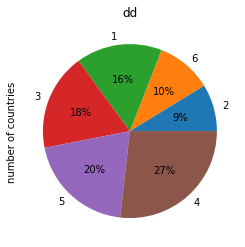

In [15]:

num_country = num_country.set_index("Continent")
country_plot = num_country['number of countries']
country_plot.plot.pie(title = "dd",autopct='%1.0f%%')

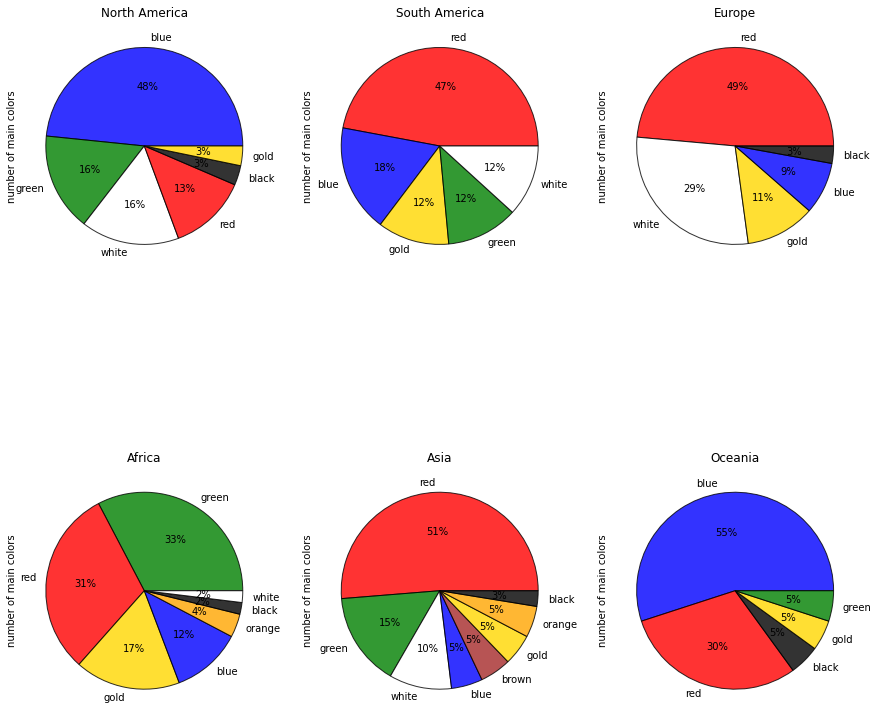

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 2,ncols = 3,figsize=(15,15))

#matplotlib.rcParams["font.size"] = 10
#plt.axes().set_ylabel('')
#ax.set_ylabel('')
NA_plot.plot.pie(title = "North America",autopct='%1.0f%%',colors = list(mainhue_NA.index),ax = axs[0,0],
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
SA_plot.plot.pie(title = "South America",autopct='%1.0f%%',colors = list(mainhue_SA.index),ax = axs[0,1],
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
EU_plot.plot.pie(title = "Europe",autopct='%1.0f%%',colors = list(mainhue_EU.index),ax = axs[0,2],
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
Afri_plot.plot.pie(title = "Africa",autopct='%1.0f%%',colors = list(mainhue_Afri.index),ax = axs[1,0],
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
Asi_plot.plot.pie(title = "Asia",autopct='%1.0f%%',colors = list(mainhue_Asi.index),ax = axs[1,1],
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
Oce_plot.plot.pie(title = "Oceania",autopct='%1.0f%%',colors = list(mainhue_Oce.index),ax = axs[1,2],
                wedgeprops={'alpha':0.8,"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.savefig("fig1.svg", bbox_inches="tight")

In [17]:
pattern1 = {}
a = NorthAme["sunstars"].to_numpy()
pattern1["sunstars"] = (a != 0).astype(int).sum()
b = NorthAme["crescent"].to_numpy()
pattern1["crescent"] = (b != 0).astype(int).sum()
c = NorthAme["icon"].to_numpy()
pattern1["icon"] = (c != 0).astype(int).sum()
d = NorthAme["animate"].to_numpy()
pattern1["animate"] = (d != 0).astype(int).sum()

In [18]:
c = NorthAme["icon"].to_numpy()
(c != 0).astype(int).sum()

9

In [19]:
pattern1

{'sunstars': 10, 'crescent': 0, 'icon': 9, 'animate': 13}

In [20]:
pattern2 = {}
a = SouthAme["sunstars"].to_numpy()
pattern2["sunstars"] = (a != 0).astype(int).sum()
b = SouthAme["crescent"].to_numpy()
pattern2["crescent"] = (b != 0).astype(int).sum()
c = SouthAme["icon"].to_numpy()
pattern2["icon"] = (c != 0).astype(int).sum()
d = SouthAme["animate"].to_numpy()
pattern2["animate"] = (d != 0).astype(int).sum()

In [21]:
pattern2

{'sunstars': 8, 'crescent': 0, 'icon': 3, 'animate': 3}

In [22]:
pattern3 = {}
a = Europe["sunstars"].to_numpy()
pattern3["sunstars"] = (a != 0).astype(int).sum()
b = Europe["crescent"].to_numpy()
pattern3["crescent"] = (b != 0).astype(int).sum()
c = Europe["icon"].to_numpy()
pattern3["icon"] = (c != 0).astype(int).sum()
d = Europe["animate"].to_numpy()
pattern3["animate"] = (d != 0).astype(int).sum()

In [23]:
pattern3

{'sunstars': 4, 'crescent': 0, 'icon': 9, 'animate': 4}

In [24]:
pattern4 = {}
a = Africa["sunstars"].to_numpy()
pattern4["sunstars"] = (a != 0).astype(int).sum()
b = Africa["crescent"].to_numpy()
pattern4["crescent"] = (b != 0).astype(int).sum()
c = Africa["icon"].to_numpy()
pattern4["icon"] = (c != 0).astype(int).sum()
d = Africa["animate"].to_numpy()
pattern4["animate"] = (d != 0).astype(int).sum()

In [25]:
pattern4

{'sunstars': 24, 'crescent': 4, 'icon': 9, 'animate': 7}

In [26]:
pattern5 = {}
a = Asia["sunstars"].to_numpy()
pattern5["sunstars"] = (a != 0).astype(int).sum()
b = Asia["crescent"].to_numpy()
pattern5["crescent"] = (b != 0).astype(int).sum()
c = Asia["icon"].to_numpy()
pattern5["icon"] = (c != 0).astype(int).sum()
d = Asia["animate"].to_numpy()
pattern5["animate"] = (d != 0).astype(int).sum()

In [27]:
pattern5

{'sunstars': 20, 'crescent': 7, 'icon': 13, 'animate': 6}

In [28]:
pattern6 = {}
a = Oceania["sunstars"].to_numpy()
pattern6["sunstars"] = (a != 0).astype(int).sum()
b = Oceania["crescent"].to_numpy()
pattern6["crescent"] = (b != 0).astype(int).sum()
c = Oceania["icon"].to_numpy()
pattern6["icon"] = (c != 0).astype(int).sum()
d = Oceania["animate"].to_numpy()
pattern6["animate"] = (d != 0).astype(int).sum()

In [29]:
pattern6

{'sunstars': 14, 'crescent': 0, 'icon': 6, 'animate': 6}

In [30]:

#for continent in (NorthAme,SouthAme,Europe,Africa,Asia,Oceania):

In [31]:
images = pd.DataFrame({"North America": pattern1, "South America":pattern2,"Europe":pattern3,
                     "Africa":pattern4,"Asia":pattern5,"Oceania":pattern6})
images = images.transpose()
images

sunstars  crescent  icon  animate
North America        10         0     9       13
South America         8         0     3        3
Europe                4         0     9        4
Africa               24         4     9        7
Asia                 20         7    13        6
Oceania              14         0     6        6

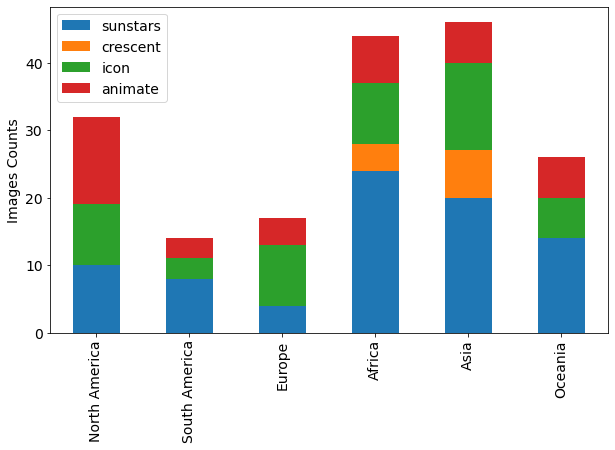

In [32]:
matplotlib.rcParams["font.size"] = 14
ax = images.plot.bar(stacked=True,figsize=(10,6))
ax.set_ylabel("Images Counts")
ax
ax.get_figure().savefig("fig2.svg", bbox_inches="tight")

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

In [78]:
m = df["Religion"].to_numpy()
(m == 2).astype(int).sum()
df["muslim"]=(m == 2).astype(int)

In [83]:
lr = LogisticRegression()
train, test = train_test_split(df)
#lr.fit(df[["crescent", "green"]], df["Religion"])

In [84]:
lr.fit(train[["crescent", "green"]], train["muslim"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
lr.coef_

array([[1.69219496, 0.80650264]])

In [86]:
(lr.score(train[["crescent", "green"]], train["muslim"]),
lr.score(test[["crescent", "green"]], test["muslim"]))

(0.8275862068965517, 0.8775510204081632)

In [87]:
cm = confusion_matrix(df["muslim"], lr.predict(df[["crescent", "green"]]))
cm

array([[158,   0],
       [ 31,   5]])

In [88]:
#when we actually have a 0, the model is 100% correct, while we actually have a 1, the model is only 13.89% correct.
recall_score(df["muslim"], lr.predict(df[["crescent","green"]]),average = None)

array([1.        , 0.13888889])

In [76]:
balanced_accuracy_score(df["muslim"], lr.predict(df[["crescent", "green"]]))

0.5694444444444444

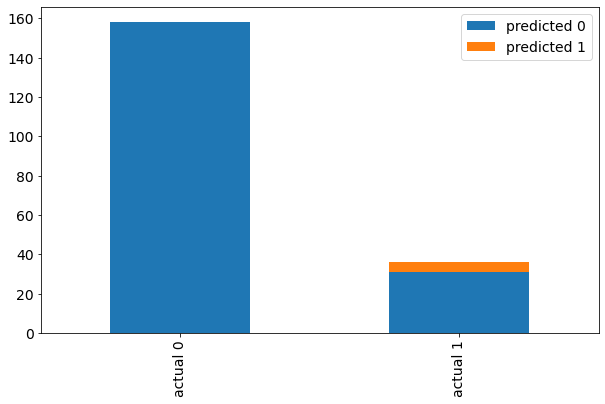

In [52]:
cmdf = pd.DataFrame(cm,columns = ["predicted 0","predicted 1"],index = ["actual 0","actual 1"])
ax = cmdf.plot.bar(stacked=True,figsize=(10,6))
ax.get_figure().savefig("fig3.svg", bbox_inches="tight")

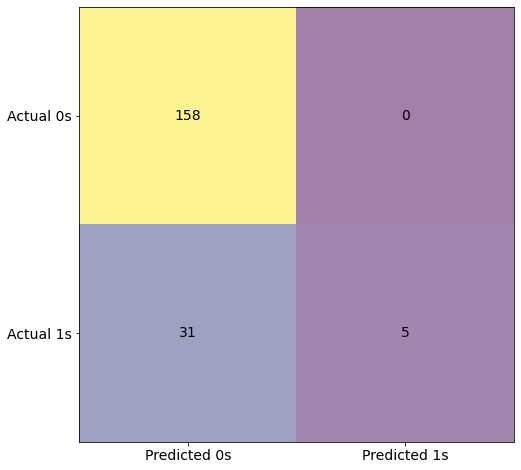

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,alpha = 0.5)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()